In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
originalDataframe = pd.read_csv("Categorical.csv")
dataframe = originalDataframe.copy()

In [3]:
dataframe = dataframe.loc[:, ["Longitude", "Latitude"]]
dataframe.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [11]:
# Select number of clusters
k = 4
# Specify list of colors
colors = ["black", "red", "yellow", "green", "blue", "purple", "pink", "olive", "darkoragne", "cyan"]

In [12]:
def distance(a, b):
    d = 0
    for x1, x2 in zip(a, b):
        d += (x1 - x2)**2
    d = d**(1/2)
    return d

In [13]:
def KMeans(df, k, means):
    clusters = {}
    for i in range(k):
        clusterName = "c"+ str(i)
        clusters[clusterName] = list()
    
    values = df.values.tolist()
    # Step 1: calculate distance between data points and the mean. Then assign each point to a cluster
    for row in values:
        distances = []
        for c in range(k):
            distances.append(distance(row, means[c]))

        cluster = np.argmin(distances)
        
        chosenClusterName = "c"+str(cluster)
        
        clusters[chosenClusterName].append(row)
        
    
    return clusters

Iteration number: 1
Clusters' means: [[-61.357726, 15.439470199999999], [56.09166155, 20.60515333], [6.07182201, 49.76725361], [66.00473366, 33.83523073]]


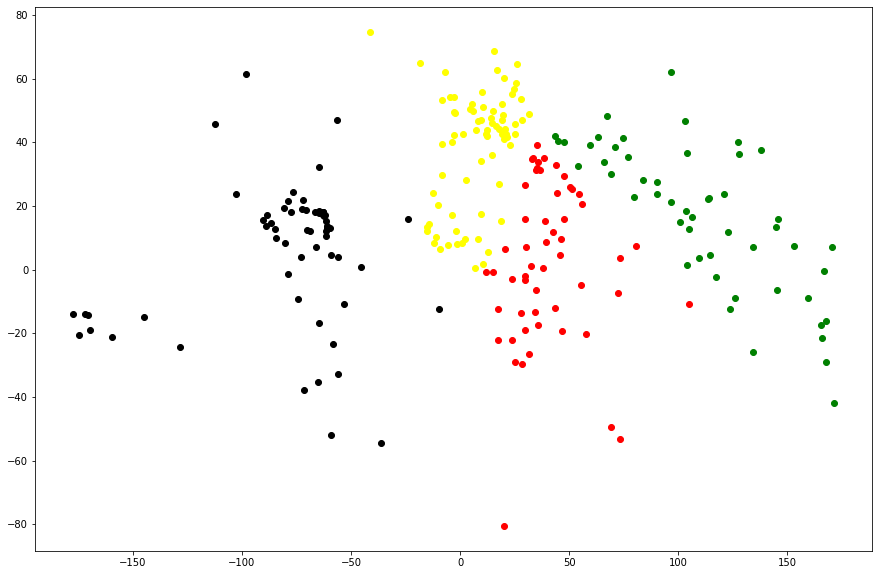

Iteration number: 2
Clusters' means: [array([-79.92900755,   5.43047556]), array([40.48024381,  2.09692132]), array([ 7.36412043, 38.22145405]), array([110.79660705,  16.85311722])]


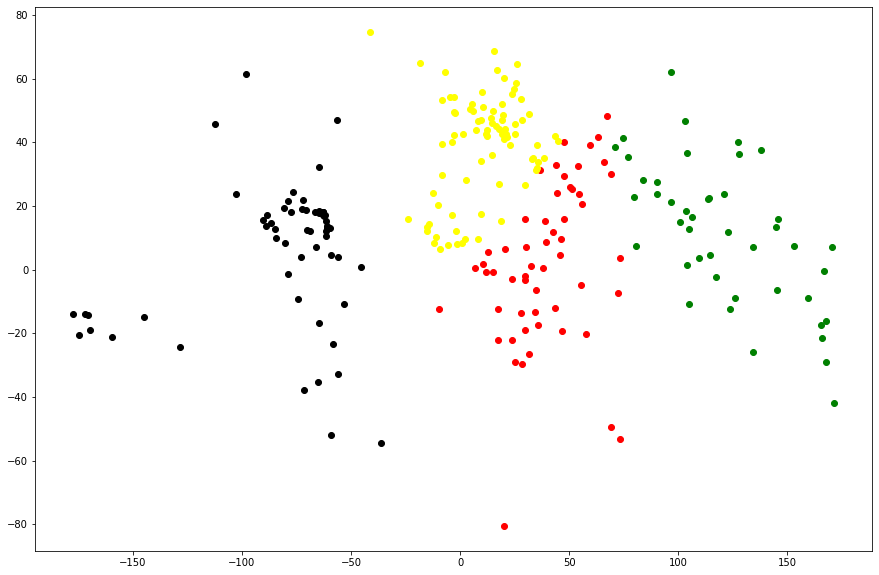

Iteration number: 3
Clusters' means: [array([-82.03484643,   5.55229685]), array([39.48019063,  1.98762602]), array([10.4367263 , 38.86613555]), array([120.92671167,  11.55316947])]


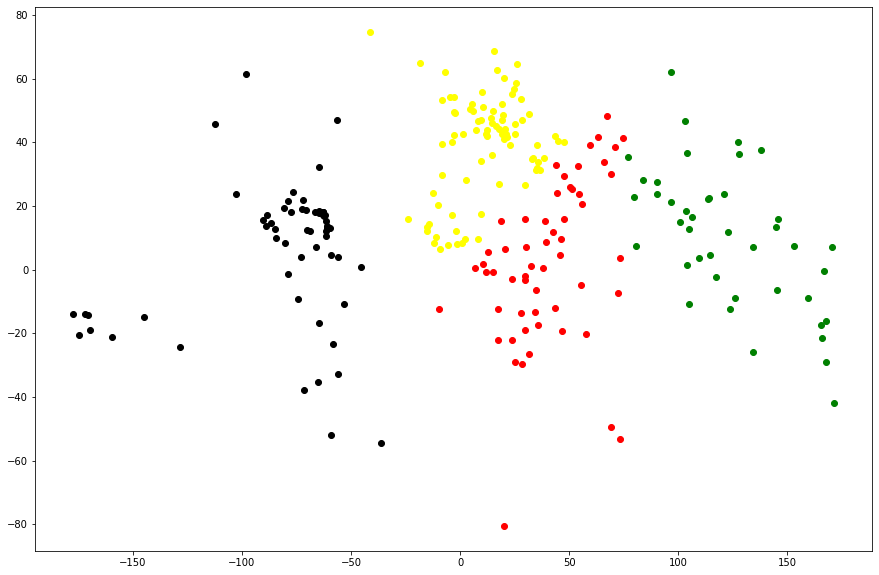

Iteration number: 4
Clusters' means: [array([-82.03484643,   5.55229685]), array([40.20166663,  2.37698891]), array([11.10221676, 39.07498603]), array([123.21952457,  10.19873294])]


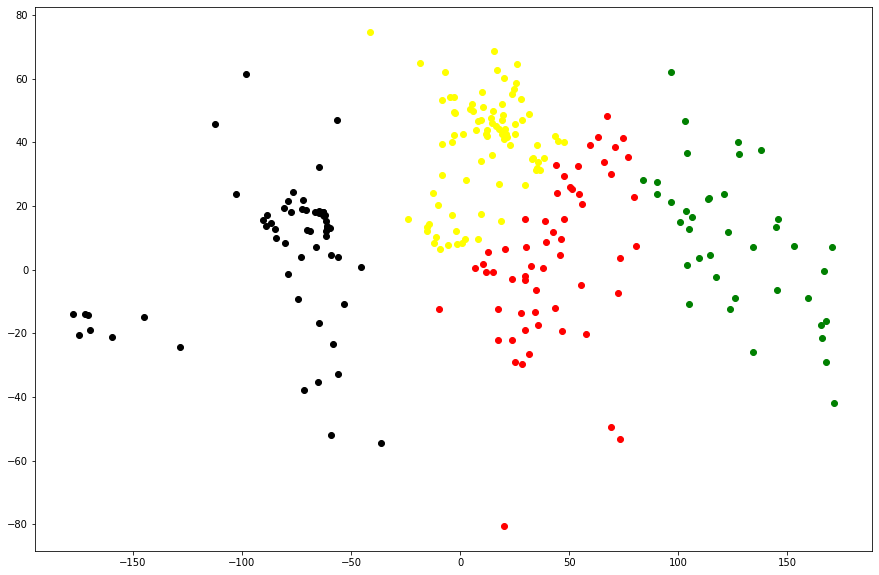

In [15]:
# Random means
means = dataframe.sample(k).values.tolist()

for i in range(4):
    print("Iteration number: {}".format(i+1))
    print("Clusters' means: {}".format(means))
    clusters = KMeans(dataframe, k, means)
    newMeans= []
    for c in range(k):
        newMeans.append(np.array(clusters["c"+str(c)]).mean(axis=0))
        
    means = newMeans
    
    plt.figure(figsize=(15, 10))
    
    for c in range(k):
        for p in clusters['c'+str(c)]:
            plt.scatter(p[0], p[1], color=colors[c])
    
    plt.show()
    